In [2]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics  import accuracy_score
from PIL import Image

import tensorflow as tf
# example of converting an image with the Keras API
from tensorflow.keras.preprocessing.image import load_img , img_to_array, array_to_img 
make_dataset = tf.keras.utils.image_dataset_from_directory


GOAL : train an image classification model for this dataset https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset that contains 33 types of vegetables

In [3]:
data_path = r"D:\Data for python\datasets\fruitdataset"
train_path = fr"{data_path}\train"
test_path = fr"{data_path}\test"

train_files = [os.path.abspath(os.path.join(folder, file)) for folder, subfolder, files in os.walk(train_path) for file in files if file.endswith("jpg")]
test_files = [os.path.join(test_path,file) for file in os.listdir(test_path)]


In [4]:
def plot_color_image(image, title="name"):
    img = mpl.image.imread(image)
    plt.imshow(img)
    plt.title(title)
    plt.show()
    plt.axis("off")

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")    

In [5]:
img = load_img(train_files[1], color_mode="rgb")
img_to_array(img)

array([[[255., 255., 248.],
        [253., 255., 247.],
        [253., 255., 250.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 250.],
        [255., 255., 251.],
        [254., 255., 251.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [6]:
train_dataset = make_dataset(train_path, image_size=(100,100), labels="inferred", label_mode ="int",subset="training", validation_split = 0.2, seed=33)
validation_dataset = make_dataset(train_path, image_size=(100,100),labels="inferred", label_mode ="int", subset="validation", validation_split = 0.2, seed=33)

Found 16854 files belonging to 33 classes.
Using 13484 files for training.
Found 16854 files belonging to 33 classes.
Using 3370 files for validation.


In [7]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
y = np.concatenate([y for x, y in train_dataset], axis=0)

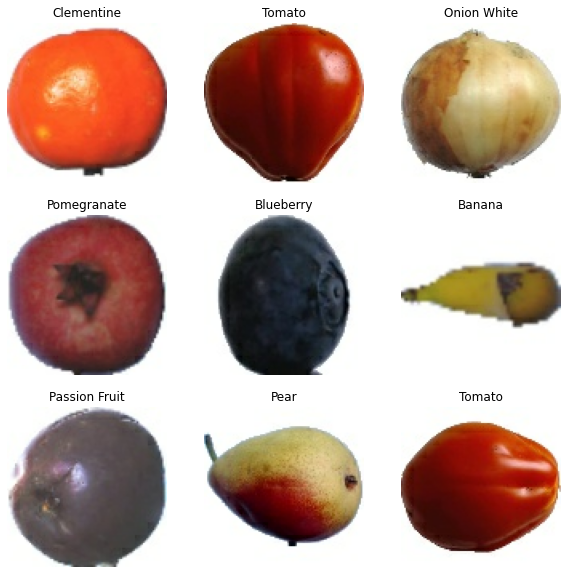

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_dataset.class_names[labels[i]])
    plt.axis("off")

In [10]:
test_ds = make_dataset(r"D:\Data for python\datasets\fruitdataset\test", shuffle=False,  image_size=(100,100), label_mode= None)

Found 5641 files belonging to 1 classes.


In [11]:
num_classes = 33
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(24, 2, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(24, 2, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(24, 2, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(24, 2, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='Nadam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=2
)  

Epoch 1/2
422/422 [==============================] - 113s 263ms/step - loss: 0.5184 - accuracy: 0.8541 - val_loss: 0.0753 - val_accuracy: 0.9774
Epoch 2/2
422/422 [==============================] - 86s 204ms/step - loss: 0.1394 - accuracy: 0.9832 - val_loss: 0.0063 - val_accuracy: 0.9994


In [12]:
preds = model.predict(test_ds)

177/177 [==============================] - 28s 149ms/step


In [13]:
predis = [np.argmax(arr) for arr in preds]

In [14]:
answers = r"D:\Data for python\datasets\fruitdataset\answers.csv"
ans = pd.read_csv(answers)
ans.id = ans.id.apply(lambda name: int(name.replace(".jpg", "")))
ans.sort_values(by=["id"], inplace=True)
ans.reset_index(drop=True, inplace=True)
anscoded = [train_dataset.class_names.index(name) for name in ans.label]


 

accuracy_score(anscoded, predis)

0.9390179046268392

In [15]:
mistakes =  [index for index, value in enumerate(predis) if value != anscoded[index]]

In [27]:
len(mistakes)

344

In [17]:
from os import listdir
test_path = r"D:\Data for python\datasets\fruitdataset\test\images"

test_imgs = [os.path.join(test_path, file) for file in os.listdir(test_path)]

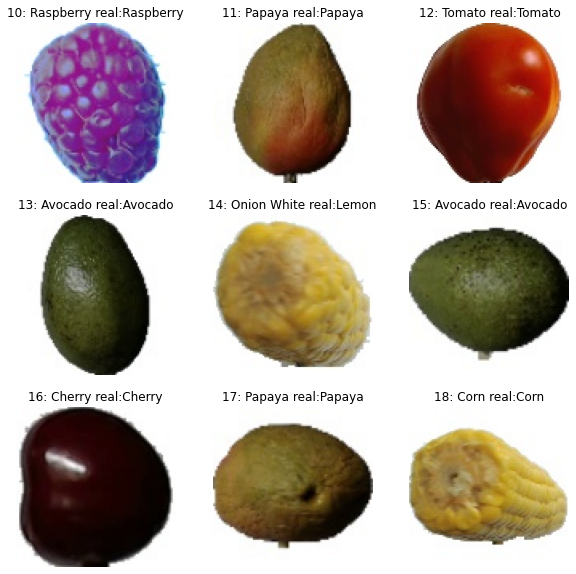

In [18]:
start = 10
sample = range(start, start + 9)
plt.figure(figsize=(10, 10))
for idx, index in enumerate(sample):
  ax = plt.subplot(3, 3, idx + 1)
  plt.imshow(mpl.image.imread(test_ds.file_paths[index]))
  plt.title(f"{idx + start}: {train_dataset.class_names[predis[index]]} real:{ans.label[index]}")
  plt.axis("off")

a few entries are mislabeled, like item 14 above (corn labeled as lemon)

In [19]:
x = np.concatenate([img_to_array(load_img(impath,color_mode="grayscale")).reshape(100,100) / 255 for impath in train_files], axis=0)

In [20]:
x_test = np.concatenate([img_to_array(load_img(impath,color_mode="grayscale")).reshape(100,100) / 255 for impath in test_imgs], axis=0)

In [21]:
import sys
sys.getsizeof(x) / (1024 * 1024)

642.92919921875

In [23]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=33)
# clusterer =  kmeans.fit(x)

In [24]:
#clusters = clusterer.predict(x_test)

In [25]:
# def show_cluster_samples(code):
#     sample = []
#     while len(sample) < 9:
#         for i, val in enumerate(clusters):
#             if val == code:
#                 sample.append(i)
#     plt.figure(figsize=(10, 10))
#     for idx, index in enumerate(sample):
#         if idx < 9:
#             ax = plt.subplot(3, 3, idx + 1 )
#             plt.imshow(mpl.image.imread(test_ds.file_paths[index]))
#             plt.title(f"{idx + start}: {train_dataset.class_names[predis[index]]} real:{ans.label[index]}")
#             plt.axis("off")

In [26]:
#show_cluster_samples(11)